In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
# Read the csv file into a pandas DataFrame

beer = pd.read_csv('../../data/beer.csv')
beer.head()

,Unnamed: 0,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [12]:
# rename the colmuns to make more sense
beer.rename(columns={"review_overall": "Overall_Score", "review_aroma": "Aroma_Score", 
                     "review_appearance":"Appearance_Score", "review_palate": "Palate_Score",
                     "review_taste":"Taste_Score"},inplace=True)

beer.head()

,Unnamed: 0,brewery_id,brewery_name,review_time,Overall_Score,Aroma_Score,Appearance_Score,review_profilename,beer_style,Palate_Score,Taste_Score,beer_name,beer_abv,beer_beerid
0,0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [13]:
# Assign the data to X and y

X = beer[["Aroma_Score", "Appearance_Score","Palate_Score","Taste_Score"]]
#y = beer["Overall_Score"].values.reshape(-1, 1)
y = beer["Overall_Score"]
print(X.shape, y.shape)

(1518478, 4) (1518478,)


In [14]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [15]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [16]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6537482423139352
Testing Score: 0.6549983144979434


In [20]:
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 0.44866873392309037
Coefficients: 
 [0.04795438 0.03599936 0.25782652 0.54921143]


### So taste weights 0.55, palate weights 0.26, appearance weights 0.03, aroma weights 0.04

Text(0.5, 1.0, 'Residual Plot for training data')

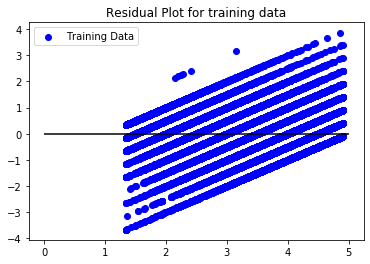

In [17]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
#plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot for training data")
### END SOLUTION


Text(0.5, 1.0, 'Residual Plot for testing data')

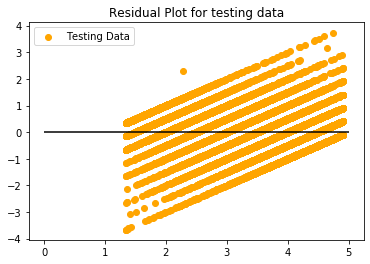

In [18]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
#plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot for testing data")
### END SOLUTION